# Lesson 1 - Intro

This is an intro to the course. <br/>
Complete notebook can be found [here](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra-v2/blob/master/nbs/01-Why-are-we-here.ipynb).

## Matrix Computations

Here we are looking at two main matrix operations:

* Matrix Multiplication (Dot Product)
* Convolutions
* Matrix Decomposition


In [1]:
import numpy as np

### Matrix Multiplication Example

![](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra-v2/blob/master/nbs/images/shop.png)

In [4]:
quantity = np.array([
    [6, 5, 3, 1],
    [3, 6, 2, 2],
    [3, 4, 3, 1]
])p

In [5]:
prices = np.array([
    [1.5, 1],
    [2, 2.5],
    [5, 4.5],
    [16, 17]
])

In [11]:
quantity@prices

array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

### Convolutions

More info: https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra-v2/blob/master/nbs/01-Why-are-we-here.ipynb#Convolution

Basically this is a kind of a filter. Now let's give ia try.

In [14]:
## Basic Setup
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

**Dataset to work on this: MNIST**

In [16]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/home/arunoda_susiripala/anaconda3/envs/fastai-v1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/arunoda_susiripala/anaconda3/envs/fastai-v1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [23]:
## This is the data we have. Each image is 28x28 and we've 70000 of such images
mnist.data.shape

(70000, 784)

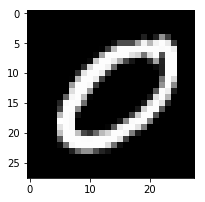

In [29]:
## Let's render some images
images = np.reshape(mnist.data, (70000, 28, 28))
plot(images[223])

In [32]:
## Let's figure of the label of the above image
mnist.target.shape

(70000,)

In [37]:
labels = mnist.target.astype(int)
labels[223]

0

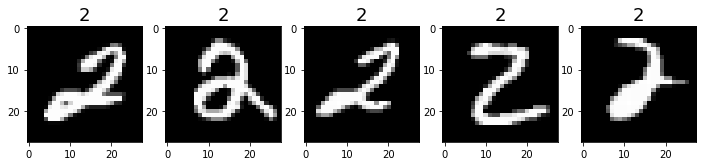

In [47]:
## Let's render a series of images
idx = slice(16000, 16005)
plots(images[idx], titles=labels[idx])

In [60]:
## Zoom and crop the top,right part of the image
images[16000, :14, 14:].shape

(14, 14)

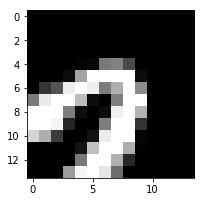

In [61]:
plot(images[16000, :14, 14:])

**Edge Detection**

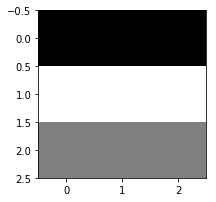

In [97]:
c_top = [
    [-1, -1, -1],
    [1, 1, 1],
    [0, 0, 0]
]
plot(c_top)

In [85]:
images[16000][:14, 14:20]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,   7],
       [  0,   0,   0,  11, 162, 253],
       [  0,  52,  83, 235, 253, 237],
       [120, 231, 253, 253, 186,  13],
       [253, 253, 253, 125,  14,   0],
       [253, 253, 241,  37,   0,   0],
       [210, 173,  59,   0,   0,  18],
       [  0,   0,   0,   0,  19, 190],
       [  0,   0,   0,   0, 121, 253],
       [  0,   0,   0, 155, 244, 253]])

In [86]:
## We need to normalize images into 0, 1 range from 0, 255
images = images/255

In [88]:
## Let's print them again
images[16000][:14, 14:20]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.0118, 0.0275],
       [0.    , 0.    , 0.    , 0.0431, 0.6353, 0.9922],
       [0.    , 0.2039, 0.3255, 0.9216, 0.9922, 0.9294],
       [0.4706, 0.9059, 0.9922, 0.9922, 0.7294, 0.051 ],
       [0.9922, 0.9922, 0.9922, 0.4902, 0.0549, 0.    ],
       [0.9922, 0.9922, 0.9451, 0.1451, 0.    , 0.    ],
       [0.8235, 0.6784, 0.2314, 0.    , 0.    , 0.0706],
       [0.    , 0.    , 0.    , 0.    , 0.0745, 0.7451],
       [0.    , 0.    , 0.    , 0.    , 0.4745, 0.9922],
       [0.    , 0.    , 0.    , 0.6078, 0.9569, 0.9922]])

In [98]:
## Let's do a convolution (we use something called correlate)
i_top = correlate(images[16000], c_top)

In [99]:
## Let's check values. They should be different
i_top[:14, 14:20]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.0118,  0.0392,  0.5098],
       [ 0.    ,  0.    ,  0.0431,  0.6667,  1.6314,  2.1098],
       [ 0.2039,  0.5294,  1.4078,  1.5608,  1.1725, -0.2157],
       [ 1.2   ,  1.8392,  1.4392,  0.4745, -1.0706, -1.6235],
       [ 1.2824,  0.6078, -0.4157, -1.1765, -1.2275, -0.6745],
       [ 0.2902, -0.0471, -0.3922, -0.4471, -0.4   ,  0.3843],
       [-0.651 , -1.1961, -1.1725, -0.8588, -0.0745,  0.498 ],
       [-2.3255, -1.7333, -0.9098, -0.1569,  0.749 ,  0.8235],
       [ 0.    ,  0.    ,  0.    ,  0.4   ,  0.6471,  0.6471],
       [ 0.    ,  0.    ,  0.6078,  1.0902,  1.0902,  0.3804]])

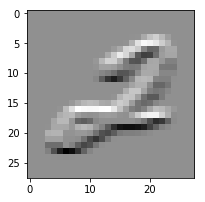

In [101]:
## Let's plot the result
plot(i_top)

In the above, top outlines are marked with white pixels.